<a href="https://colab.research.google.com/github/Ngoson2004/Deep-Learning-for-Vietnamese/blob/main/Logistic_Regression_with_SMOTE_for_VietnamBankCustomer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hồi quy Logistics (Logistic Regression)

HỒi quy Logistic, hay còn gọi là Logistic Regression, là một trong những thuật toán cơ bản nhất của Học máy. Logistic Regression thường được sử dụng để phân loại một đối tượng dựa trên những đặc điểm có sẵn của đối tượng đấy. Ví dụ, một bác sĩ muốn làm xét nghiệm trên bệnh nhân bị bệnh về u bướu. Khối u đó có thể lành tính hoặc ác tính.

Logistic regression có thể được áp dụng vào việc xét nghiệm này, vì nó có thể phân loại khối u thành 2 nhóm: lành tính hoặc ác tính, dựa trên việc xử lí những dữ liệu có sẵn về khối u như kích cỡ và vị trí.


Trong notebook này, tôi sẽ sử dụng thuật toán Logistic Regression để dự đoán khả năng một nguời có gửi tiền vào ngân hàng theo kì hạn hay không. Ta sẽ dựa vào một số thông tin như là tuổi, số dư ngân hàng, trình độ học vấn, vv.

## Mục lục

## 1. Khởi động


Trước tiên, ta phải nhập về các thư viện cần thiết

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

Sau đó là nhập data. Tôi sẽ cho bạn thấy data mà chúng ta chuẩn bị làm việc này trông như thế nào.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/BankCustomerData.csv')
df.head()
#print(df.head())

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,1,58,management,2,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,2,44,technician,1,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,3,33,entrepreneur,2,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,4,47,blue-collar,2,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,5,33,unknown,1,unknown,0,1,0,0,5,may,198,1,-1,0,0


In [ ]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [ ]:
np.shape(df)

(42639, 16)

Như bạn đã thấy, thuật toán của chúng ta có thể dự đoán một người có gửi tiền hay không dựa vào những số liệu như tuổi, nghề nghiệp, số dư ngân hàng, vv. Tổng cộng ta có gần 43 nghìn hàng và 16 cột.

Nếu bạn để ý, ta có một cột "term_deposit". Cột này được gọi là **ground-truth label**, hay còn gọi là "sự thật nền tảng". Đúng như tên gọi của nó, model sẽ lấy cột này làm nền tảng cho việc dự đoán, vì nó là kết quả cuối cùng ghi lại được của một người: cô ấy/ anh ấy có gửi tiền hay không.

Bây giờ chúng ta sẽ bắt đầu xử lí data

## 2. Xử lí và chiết xuất data

In [ ]:
df.isna().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

Nếu dữ liệu của chúng ta có giá trị nào đó rỗng (không được xác định), ta cần loại bỏ chúng. Vì nếu ta để nguyên, toàn bộ quá trình training của ta sẽ bị hỏng. May mắn thay, câu lệnh bên trên cho thấy không có giá trị nào trong dataset bị rỗng.

Tuy nhiên, để chạy được logistic regression, tất cả các cột dữ liệu của chúng ta đều phải ở dạng số nguyên (int) hoặc số thập phân (float). Vậy nên những cột có dữ liệu văn bản (string) như Job và Education sẽ cần phải được chuyển sang dạng số.

Ngoài ra, một số cột không cần thiết như ID, thời gian sẽ cần phải được lược bỏ. Chúng không giúp ích được nhiều cho việc dự đoán.

In [ ]:
df = df.drop(['ID', 'day', 'month'], axis=1)

Để chuyển hoá các dữ liệu văn bản thành dạng số, ta có thể dùng hàm LabelEncoder từ thư viện scikit-learn. Hàm này sẽ chia các giá trị thành các tập hợp khác nhau, văn bản giống nhau thì cho vào cùng một tập. Sau dó, LabelEncoder sẽ đánh số các mỗi tập. Ví dụ, với cột "trình độ học vấn" (education), "có bằng đại học" sẽ được đánh số 3, "có bằng phổ thông" được đánh số 2, vv,

Phương pháp này được gọi là "mã hoá nhãn" (**label encoding**). Phương pháp này rất hiệu quả cho những dữ liệu hạng mục (**categorical**) dạng văn bản như "trình độ học vấn" hay "nghề nghiệp".

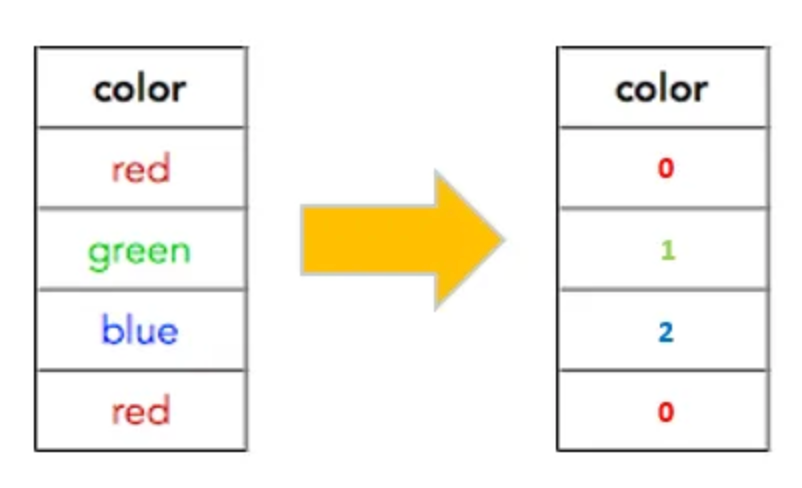

*Ảnh 1. Mã hoá nhãn. Nguồn: Medium*

Ngoài ra còn một phương pháp nữa gọi là **one-hot encoding** (mã hoá one-hot). Đây là một phương pháp truyền thống hơn dể mã hoá những dữ liệu hạng mục thành dạng nhị phân (binary). Theo TabML, phương pháp này được định nghĩa như sau:

> *Trong cách mã hóa này, một “từ điển” cần được xây dựng chứa tất cả các giá trị khả dĩ của từng dữ liệu hạng mục. Sau đó mỗi giá trị hạng mục sẽ được mã hóa bằng một vector nhị phân với toàn bộ các phần tử bằng 0 trừ một phần tử bằng 1 tương ứng với vị trí của giá trị hạng mục đó trong từ điển.*

Đối với dữ liệu của chúng ta, one-hot encoding sẽ được áp dụng với cột tình trạng hôn nhân (marital status). Vậy với mỗi khách hàng, marital status của họ sẽ được mã hoá thành một đoạn nhị phân 3 số. Mã này có thể là (0,0,1), (0,1,0) hoặc (1,0,0).

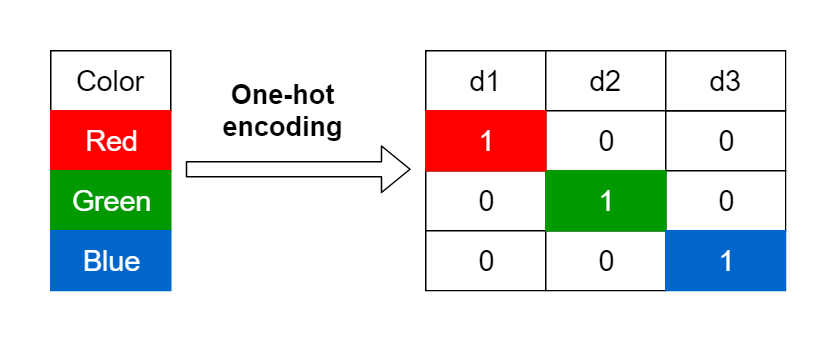

*Ảnh 2. Mã hoá one-hot. Nguồn: Medium*

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

job_encoder = LabelEncoder()
education_encoder = LabelEncoder()

df['job'] = job_encoder.fit_transform(df['job'])
df['education'] = education_encoder.fit_transform(df['education'])
df_processed = pd.get_dummies(df, columns=['marital'], dtype=float)
df_processed.loc[df_processed['pdays'] < 0, 'pdays'] = 0

In [ ]:
df_processed.head()
#print(df.head())

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,previous,term_deposit,marital_0,marital_1,marital_2
0,58,4,2,0,2143,1,0,261,1,0,0,0,0.0,0.0,1.0
1,44,9,1,0,29,1,0,151,1,0,0,0,0.0,1.0,0.0
2,33,2,1,0,2,1,1,76,1,0,0,0,0.0,0.0,1.0
3,47,1,3,0,1506,1,0,92,1,0,0,0,0.0,0.0,1.0
4,33,11,3,0,1,0,0,198,1,0,0,0,0.0,1.0,0.0


Ta đã thấy cột Job và Education được chuyển về dạng số, còn cột marital được chuyển thành 3 cột nhị phân.

In [ ]:
print("(Số hàng, số cột)", np.shape(df_processed))

(Số hàng, số cột) (42639, 15)


Ngoài ra, ta cũng cần kiểm tra **multi-collinearity** (đa cộng tuyến) giữa các đại lượng trong dữ liệu. Multi-collinearity là một hiện tượng trong phân tích hồi quy khi mà hai hoặc nhiều biến độc lập trong mô hình có tương quan mạnh mẽ với nhau. 2 đại lượng A và B có tương quan với nhau khi A thay đổi thì B cũng thay đổi.

Khi xử lí dữ liệu cho logistic regression, ta cần phải xem đại lượng nào có ảnh hưởng đến kết quả dự đoán nhiều nhất. Đối với bài toán dự đoán dữ liệu ngân hàng của chúng ta, ta cần phải xem giá trị nào có tương quan nhiều nhất với ground-truth label (term_deposit).

Đề làm được điều đó, hãy nhìn vào tấm biểu đồ này.

<Axes: title={'center': 'Biểu đồ hệ số tương quan giữa các cột giá trị'}>

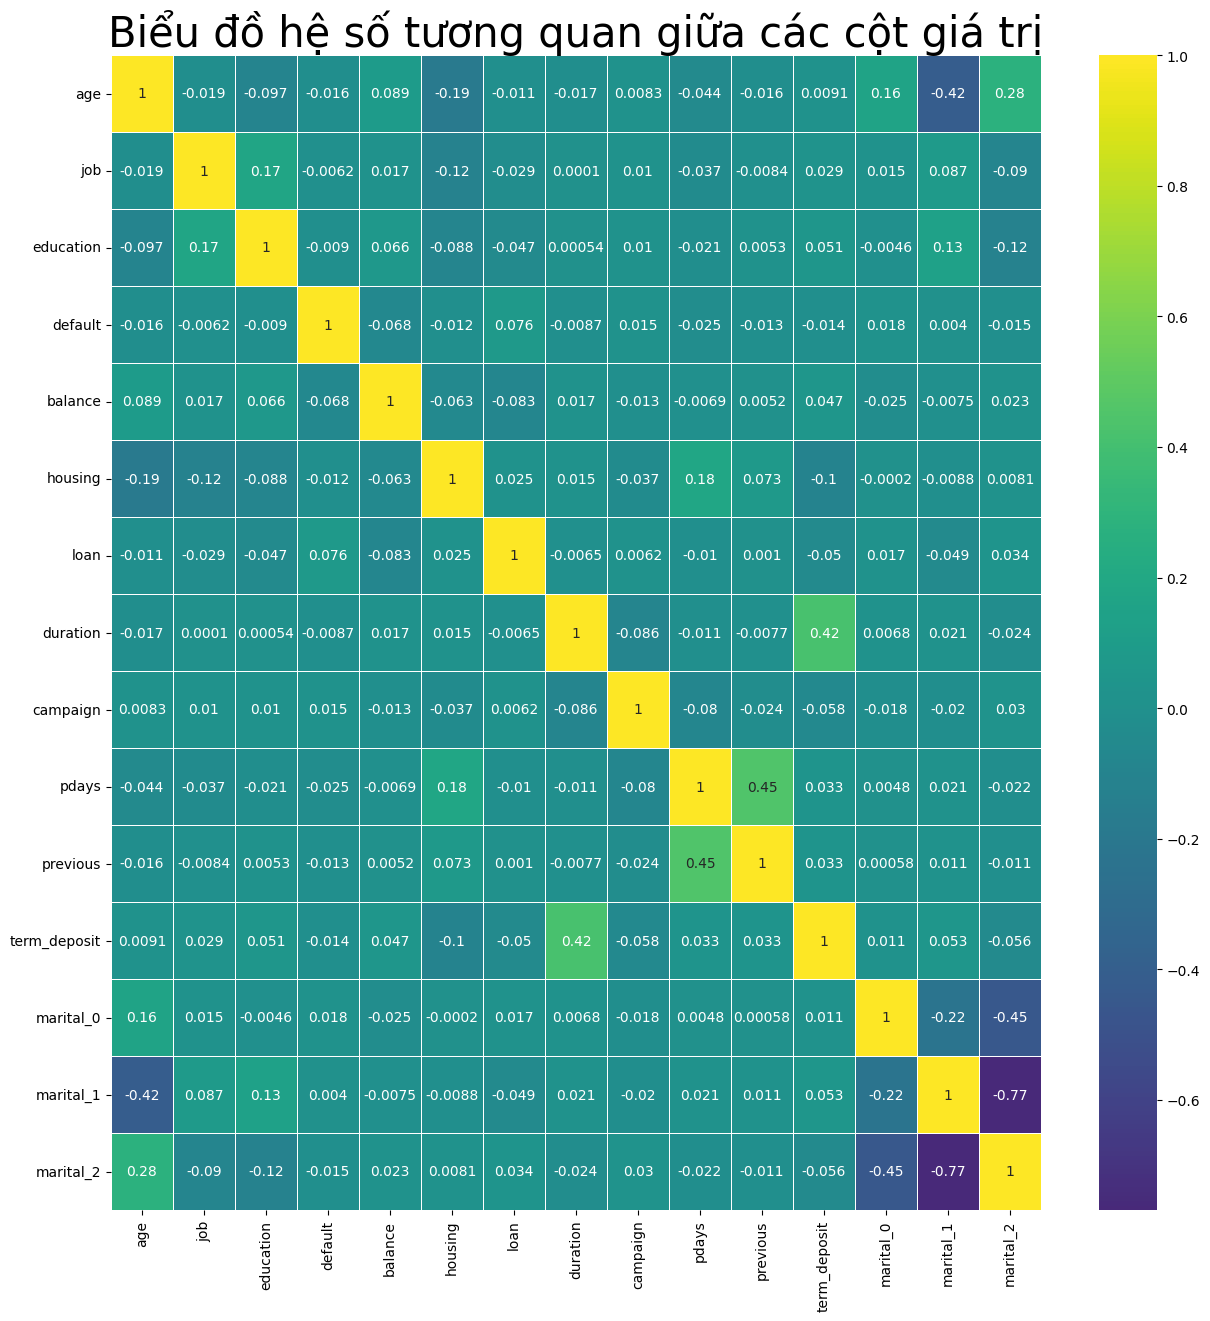

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 15))
plt.title("Biểu đồ hệ số tương quan giữa các cột giá trị", fontsize=30)
sns.heatmap(df_processed.corr(), center=0, linewidths=0.5, cmap="viridis", annot=True)

Mỗi một ô vuông chứa một con số. Con số này là **correlation coefficient** (hệ số tương quan). Giá trị tuyệt đối của số càng lớn (càng gần 1), 2 đại lượng đó càng tương quan với nhau. nếu hệ số tương quan dương thì 2 giá trị đó tỉ lệ thuận, còn âm thì ngược lại.

Hãy nhìn vào phần term_deposit của biểu đồ, ta sẽ loại đi những đại lượng có correlation coefficient thấp. Ta thấy "age" có hệ số rất thấp (dưới 0.01), nên ta sẽ bỏ cột này đi.

In [ ]:
df_final = df_processed.drop(['age'], axis=1)
print("(Số hàng, số cột):", np.shape(df_final))

(Số hàng, số cột): (42639, 14)


In [ ]:
X_data = df_final.drop(['term_deposit'], axis=1)
y_data = df_final['term_deposit']

In [ ]:
X_data, y_data = X_data.to_numpy(), y_data.to_numpy()

In [ ]:
print("Hình dạng tập đầu vào X; ", np.shape(X_data))

Hình dạng tập đầu vào X;  (42639, 13)


In [ ]:
X_data
#print(X_data)

array([[4., 2., 0., ..., 0., 0., 1.],
       [9., 1., 0., ..., 0., 1., 0.],
       [2., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [8., 1., 0., ..., 0., 1., 0.],
       [4., 2., 0., ..., 0., 1., 0.]])

In [ ]:
print("Hình dạng của sự thật nền tảng: ", np.shape(y_data))

Hình dạng của sự thật nền tảng:  (42639,)


Khi làm việc với dữ liệu bảng, việc để một chiều bị khuyết như trên có thể tạo lỗi khi luyện model về sau. Vậy nên ta cần chỉnh cho cột Y này có thêm một chiều nữa.

In [ ]:
y_data = y_data.reshape((42639,1))

In [ ]:
print("Hình dạng của sự thật nền tảng sau khi xử lí:", np.shape(y_data))

Hình dạng của sự thật nền tảng sau khi xử lí: (42639, 1)


In [ ]:
y_data

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

Khi làm việc với bài toán binary classification, một trong những vấn đề nhức nhối nhất mà các kĩ sư AI và Data Scientist hay gặp phải là dữ liệu mất cân đối (**imbalanced dataset**). Điều này xảy ra khi số lượng mẫu của một hoặc nhiều lớp thiểu số quá ít so với lớp đa số.

Lấy ví dụ với dữ liệu của chúng ta, số người đặt lãi suất kì hạn chỉ chiếm 9%. Điều này sẽ làm việc dự đoán không khách quan, từ đó kết quả sẽ không chính xác. Vì thuật toán có quá ít thông tin về người có đặt lãi suất

In [ ]:
print("Tỉ lệ người gửi lãi suất trong data:", y_data.sum()/len(y_data) * 100, "%")

Tỉ lệ người gửi lãi suất trong data: 9.289617486338798 %


Để giải quyết vấn đề này, ta sử dụng phương pháp SMOTE (Synthetic Minority Over-sampling Technique). Sau đây là cách hoạt động của SMOTE:
* Chọn một mẫu thiểu số: SMOTE bắt đầu bằng việc chọn ngẫu nhiên một mẫu từ lớp thiểu số.
* Chọn k-láng giềng gần nhất: Tìm k-láng giềng gần nhất của mẫu đã chọn (thường k=5).
* Tạo mẫu tổng hợp: SMOTE sẽ chọn một trong số các láng giềng gần nhất và tạo ra một mẫu tổng hợp mới. Mẫu tổng hợp này được tạo bằng cách lấy điểm trung bình có trọng số giữa mẫu đã chọn và láng giềng. Công thức này là:

\begin{equation}newSample=sample+gap×(neighbor−sample)\end{equation}

Trong đó, gap là một số ngẫu nhiên trong khoảng từ 0 đến 1.

Để thực hiện SMOTE, ta sẽ nhập hàm SMOTE() từ thư viện imbalanced-learn, một thư viện con của scikit-learn, chuyên dùng để xử lí những data mất cân đối.

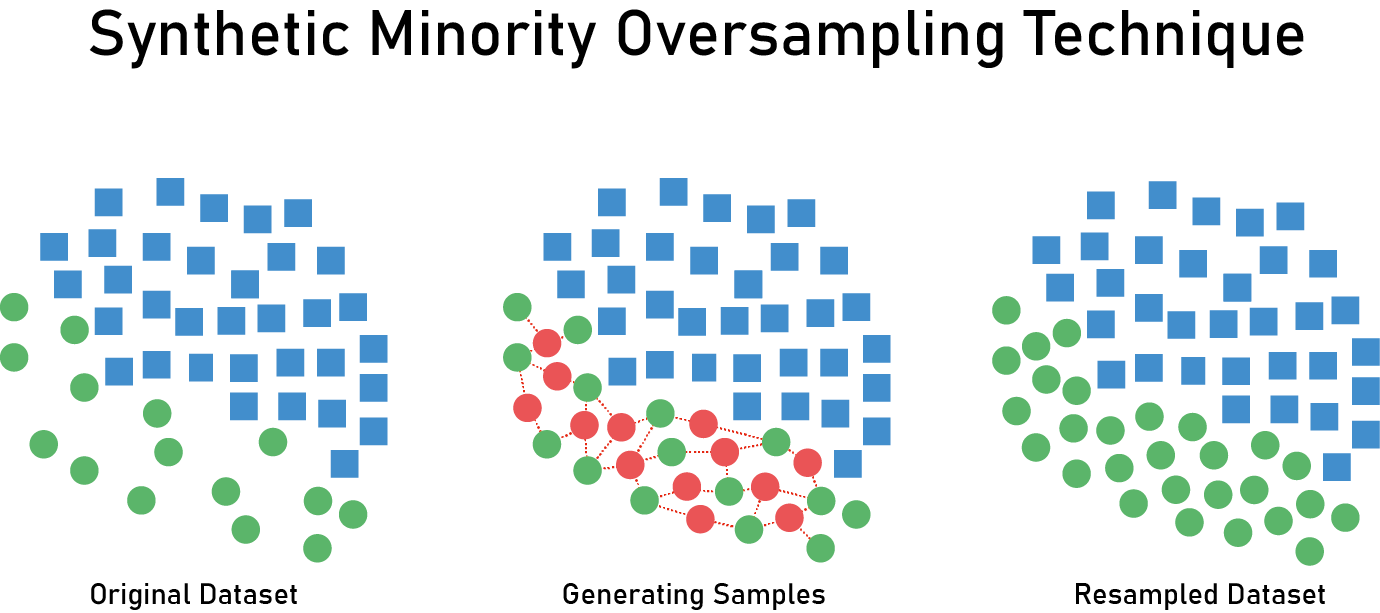

*Ảnh 3. Minh hoạ SMOTE. Nguồn: Medium*

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_data, y_data = smote.fit_resample(X_data, y_data)

In [ ]:
print("Tỉ lệ người gửi lãi suất trong data qua xử lí SMOTE:", y_data.sum()/len(y_data) * 100, "%")

Tỉ lệ người gửi lãi suất trong data qua xử lí SMOTE: 50.0 %


In [ ]:
y_data = y_data.reshape((77356,1))

Ngoài ra, mỗi cột dữ liệu của chúng ta có biên độ dữ liệu khác nhau (khoảng cách giữa giá trị lớn nhất và nhỏ nhất). Điều này có thể làm khó việc dự đoán của thuật toán. Vậy nên, việc scale lại dữ liệu sao cho đồng đều là cần thiết.

Để scale lại data, ta dùng hàm StandardScaler từ thư viện scikit-learn. Hàm này scale lại các giá trị z trong dữ liệu dựa vào công thức:

\begin{equation} z = \frac{x - \mu}{\sigma} \end{equation}

Ở đây, x là từng giá trị ở trong tập data, μ là trung bình cộng của các giá trị trong một cột, còn σ là độ lệch chuẩn của các giá trị trong cột đó.

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

Ngoài ra, ta phải tách tập X và tập Y, mỗi cái thành 2 tập mới, một tập dùng cho training (luyện mô hình), một tập dùng cho validation (đánh gía hiệu quả của mô hình).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)
print("Kích thước tập X dùng cho training: ",np.shape(X_train))
print("Kích thước tập Y dùng cho training: ",np.shape(y_train))
print("Kích thước tập X dùng cho validation: ",np.shape(X_val))
print("Kích thước tập Y dùng để cho validation: ",np.shape(y_val))

Kích thước tập X dùng cho training:  (61884, 13)
Kích thước tập Y dùng cho training:  (61884, 1)
Kích thước tập X dùng cho validation:  (15472, 13)
Kích thước tập Y dùng để cho validation:  (15472, 1)


## 3. Xây mô hình Neural Network dùng thuật toán Logistic Regression



Khi đã chuẩn bị data xong, ta sẽ thực hiện Logistic Regression trên data. Và để sự dụng Logistic Regression một cách hiệu quả, ta cần phải xây dựng một thứ gọi là Neural Network (mạng lưới neuron). Mạng lưới này có nhiệm vụ dự đoán một người có gửi tiền hay không dựa trên những thông tin ta truyền vào nó. Đây là một mạng lưới có khả năng học máy (machine learning). Nói cách khác, ta cho Neural Network tiếp xúc với data, và chúng sẽ tự cải thiện khả năng của mình bằng cách điều chỉnh các tham số tương úng. Quá trình này gọi là training.

Nếu bạn vẫn thấy khó hiểu, đừng lo, ta sẽ cùng nhau làm rõ các khái niệm ở các phần tiếp theo.

NOTE: ở phần tiếp theo, tôi sẽ dùng từ model thay cho Neural Network. Nghĩa của
chúng tương tự nhau.


---



### 3a. Cấu trúc
Cơ bản thì cấu trúc của một Neural Network 2 lớp dùng cho binary classification trông như sau:


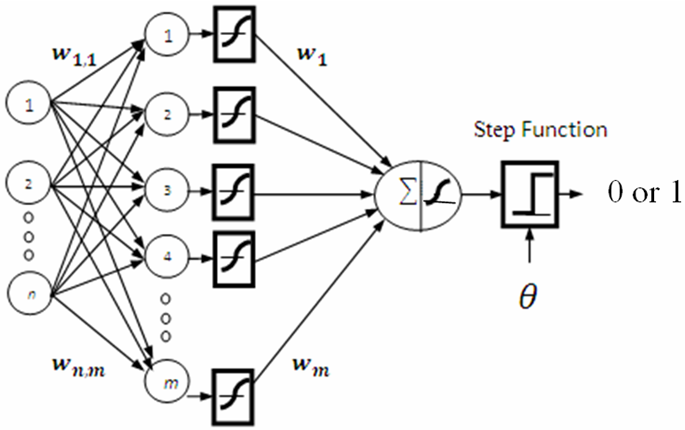

*Ảnh 4. Cấu trúc của Neural Network 2 lớp. Nguồn: ResearchGate.net*

Neural Network được tạo nên bởi các lớp (layer) khác nhau, mỗi layer gồm nhiều đơn vị, gọi là neuron. Mỗi neuron này đại diện cho một phương trình toán học và các tham số tương ứng. Neural Network bao gồm 3 kiểu lớp chính:
*   Lớp đầu vào (Input layer): Đây là lớp tiếp nhận data để bắt đầu quá trình phát triển thuật toán. Số neuron ở lớp này bằng với số cột, hay còn gọi là số features trong data của chúng ta.
*   Lớp ẩn (Hidden layer): Neural Network có thể bao gồm 1 hoặc nhiều lớp ẩn. Các lớp này sẽ tiếp nhận kết quả tính toán dưới dạng vector từ lớp đầu vào, rồi tiếp tục tính toán và điều chỉnh tham số ở các neuron.
*   Lớp đầu ra (Output layer): Lớp đầu ra sẽ bao gồm duy nhất 1 neuron, chịu trách nhiệm đưa ra kết quả dự đoán cuối cùng.

### 3b. Cơ chế
Đối với bài toán Binary Classification, ta dùng 3 phương trình chính sau đây cho model.

1. ### Linear
\begin{equation} y = wx + b \end{equation}

Đây sẽ là phương trình được dùng chủ yếu trong các neuron của Input Layer và Hidden Layer. x là data đầu vào, y là kết quả, còn **w** và **b** là những tham số. Cụ thể hơn, ta gọi w là **trọng số** (w), còn b là **độ thiên lệch** (bias). Mục tiêu của Neural Network chính là điều chỉnh w và b sao cho y đạt được như mong muốn.

Weight và bias là 2 đại lượng rất quan trọng trong AI nói chung và machine learning nói riêng. Giá trị của chúng có ảnh hưởng rất nhiều, nếu không nói là quyết định hiệu quả của model.

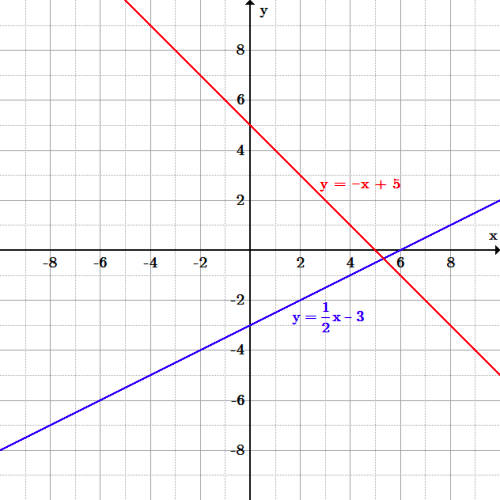

2. ### ReLU
\begin{equation} \text{ReLU}(x) = \max(0, x)\end{equation}

Hàm ReLU thường được đặt giữa các Hidden Layer để xử lí đầu ra từ hàm linear. Hàm này sẽ lọc ra những output > 0. Nếu output < 0, hàm này sẽ trả về 0.

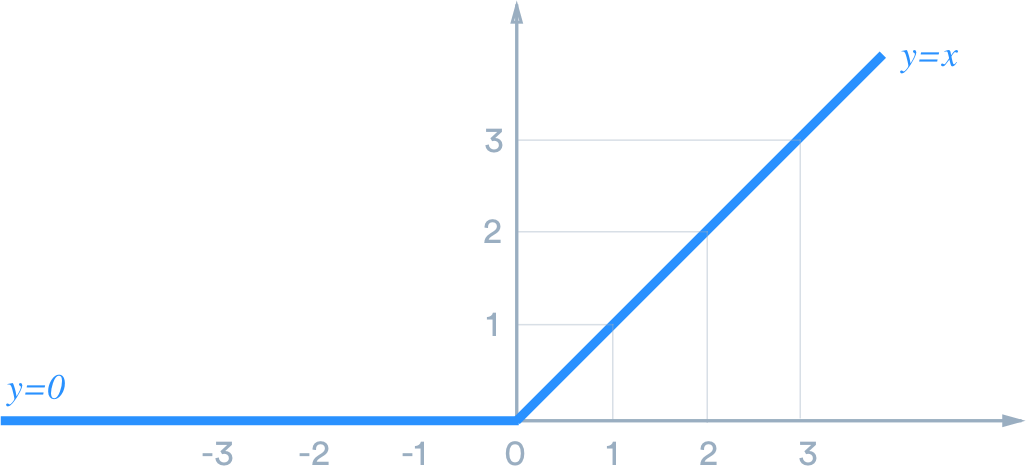

3. ### Sigmoid
\begin{equation} \sigma(x) = \frac{1}{1 + e^{-x}} \end{equation}

Hàm sigmoid được đặt ở lớp cuối cùng của neural network, gọi là output layer. Hàm này sẽ cho ra những kết quả trong khoảng giữa 0 và 1. Đây là hàm quan trọng nhất của bài toán Logistic Regression, vì nó giúp ta xác định được biên giới quyết định (decision boundary).

Trong notebook này, decision boundary của chúng ta sẽ là 0.5. Nếu hàm sigmoid của chúng ta cho ra kết quả > 0.5, khách hàng đó có gửi tiền, Ngược lại, nếu kết quả < 0.5, hành khách đó không gửi tiền.


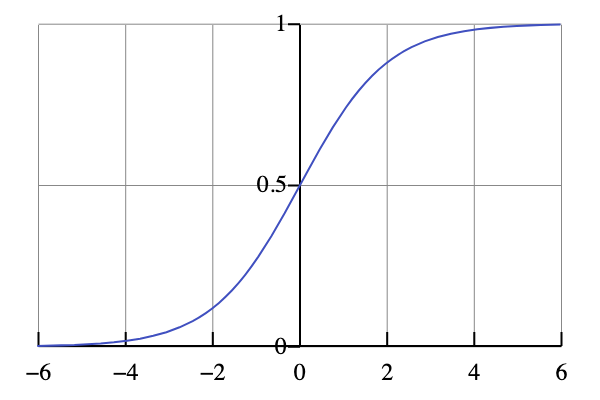

## Tiếp theo, chúng ta sẽ phân tích các bước hoạt động của neural network.

Sau đây ta sẽ cùng phân tích hoạt động của một neural network 2 lớp. Ta sẽ sử dụng thư viện Numpy làm công cụ chủ yếu để xây dựng.

In [ ]:
#Tạo hàm sigmoid
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
#Tạo hàm ReLU
def ReLU(z):
  return np.maximum(0,z)

#Tính đạo hàm của ReLU
def deriv_ReLU(z):
  return (z > 0).astype(z.dtype)

Đầu tiên ta phải khởi tạo giá trị ban đầu cho các trọng số W1, W2 và độ biến thiên b1, b2. W1 và b1 sẽ phụ trách cho lớp đầu vào, còn W2 và b2 phụ trách lớp thứ 2.

In [ ]:
def initParam():
  W1 = np.random.randn(13, 128) * np.sqrt(2/13)
  b1 = np.random.randn(1, 128) * np.sqrt(2/1)
  W2 = np.random.randn(128, 1) * np.sqrt(2/128)
  b2 = np.random.randn(1, 1) * np.sqrt(2/1)
  return W1, b1, W2, b2

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = X.dot(W1) + b1
  A1 = ReLU(Z1)
  Z2 = A1.dot(W2) + b2
  A2 = sigmoid(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.shape[0]
  #từ lớp đầu ra (output layer)
  dZ2 = A2 - Y
  dW2 = 1/m * np.dot(A1.T, dZ2)
  db2 = 1/m * np.sum(dZ2, 0)
  #từ các lớp ẩn (hidden layer)
  dZ1 =  np.dot(dZ2, W2.T) * deriv_ReLU(Z1)
  dW1 = 1/m * np.dot(X.T, dZ1)
  db1 = 1/m * np.sum(dZ1, 0)

  return dW1, db1, dW2, db2

In [ ]:
def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 -= alpha*dW1
  b1 -= alpha*db1
  W2 -= alpha*dW2
  b2 -= alpha*db2
  return W1, b1, W2, b2

In [ ]:
def get_accuracy(y_hat, y):
  predictions = (y_hat >= 0.5).astype(int)
  return np.sum(predictions == y) / len(predictions)

def grad_descent(X, Y, epoch, iters, alpha=1e-3):
  W1, b1, W2, b2 = initParam()
  for i in tqdm_notebook(range(epoch), desc='Progress'):
    print("Epoch ", i+1)
    for j in tqdm_notebook(range(iters), desc='Train step'):
      Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
      dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
      W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
      if j % 50 == 0:
        print('Iter: ', j, " Loss: ", np.mean((A2-Y) ** 2))
        print('Accuracy: ', get_accuracy(A2, Y))

  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = grad_descent(X_train, y_train, 50, 500)

Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch  1


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.4247824753092261
Accuracy:  0.5029409863615797
Iter:  50  Loss:  0.273068542097758
Accuracy:  0.562374765690647
Iter:  100  Loss:  0.2383415350086732
Accuracy:  0.6117574817400298
Iter:  150  Loss:  0.22275281075254033
Accuracy:  0.6443507207032513
Iter:  200  Loss:  0.21055568989378154
Accuracy:  0.6727910283756706
Iter:  250  Loss:  0.20051844701779198
Accuracy:  0.6966097860513218
Iter:  300  Loss:  0.19222990829263614
Accuracy:  0.7178430612112986
Iter:  350  Loss:  0.18537223025394456
Accuracy:  0.7349072458147502
Iter:  400  Loss:  0.179679610023431
Accuracy:  0.7484325512248723
Iter:  450  Loss:  0.17493182817235936
Accuracy:  0.7595501260422727
Epoch  2


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.17094890984012334
Accuracy:  0.7677590330295392
Iter:  50  Loss:  0.1675854110565703
Accuracy:  0.7734147760325771
Iter:  100  Loss:  0.1647246020435127
Accuracy:  0.7783271928123586
Iter:  150  Loss:  0.1622726557140724
Accuracy:  0.7823993277745459
Iter:  200  Loss:  0.16015386121460495
Accuracy:  0.7848878546958826
Iter:  250  Loss:  0.15830920254288347
Accuracy:  0.7876026113373409
Iter:  300  Loss:  0.15669517803601027
Accuracy:  0.7898164307413871
Iter:  350  Loss:  0.15527367744230708
Accuracy:  0.7916747462995282
Iter:  400  Loss:  0.1540112687118779
Accuracy:  0.7930482838859803
Iter:  450  Loss:  0.15288173768208105
Accuracy:  0.7947288475211687
Epoch  3


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.15186438356639612
Accuracy:  0.795956951716114
Iter:  50  Loss:  0.15094252538569305
Accuracy:  0.7967002779393705
Iter:  100  Loss:  0.15010250451974633
Accuracy:  0.797395126365458
Iter:  150  Loss:  0.1493330785759399
Accuracy:  0.7981384525887144
Iter:  200  Loss:  0.14862493158790535
Accuracy:  0.7985909120289574
Iter:  250  Loss:  0.14797030095936786
Accuracy:  0.7994150345808286
Iter:  300  Loss:  0.1473626792308066
Accuracy:  0.7993503975179368
Iter:  350  Loss:  0.1467965639946022
Accuracy:  0.7998351754896258
Iter:  400  Loss:  0.14626731705567494
Accuracy:  0.8003845905242066
Iter:  450  Loss:  0.14577094992962694
Accuracy:  0.8008532092301726
Epoch  4


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.14530404512301148
Accuracy:  0.8012895094046927
Iter:  50  Loss:  0.14486366308899148
Accuracy:  0.8017742873763816
Iter:  100  Loss:  0.14444724506234816
Accuracy:  0.8022590653480706
Iter:  150  Loss:  0.14405256310370046
Accuracy:  0.8025014543339151
Iter:  200  Loss:  0.14367765508982328
Accuracy:  0.8028892767112662
Iter:  250  Loss:  0.1433207849018194
Accuracy:  0.8035518066059079
Iter:  300  Loss:  0.14298044214154018
Accuracy:  0.8037941955917524
Iter:  350  Loss:  0.1426552517880875
Accuracy:  0.8043597698920562
Iter:  400  Loss:  0.14234400188560986
Accuracy:  0.8046183181436235
Iter:  450  Loss:  0.14204562050429523
Accuracy:  0.804844547863745
Epoch  5


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.14175912252319414
Accuracy:  0.8051192553810355
Iter:  50  Loss:  0.14148362309557844
Accuracy:  0.8054262814297718
Iter:  100  Loss:  0.141218325177099
Accuracy:  0.8055393962898326
Iter:  150  Loss:  0.14096250829063522
Accuracy:  0.8056848296813393
Iter:  200  Loss:  0.14071551308586983
Accuracy:  0.8060888113244135
Iter:  250  Loss:  0.14047673283973022
Accuracy:  0.806250403981643
Iter:  300  Loss:  0.14024562223005707
Accuracy:  0.8065574300303794
Iter:  350  Loss:  0.14002167133985066
Accuracy:  0.8068321375476698
Iter:  400  Loss:  0.1398044225184163
Accuracy:  0.8069937302048995
Iter:  450  Loss:  0.13959345088550798
Accuracy:  0.807219959925021
Epoch  6


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13938837071075974
Accuracy:  0.8075754637709263
Iter:  50  Loss:  0.13918881925337254
Accuracy:  0.8077855342253248
Iter:  100  Loss:  0.13899446788161543
Accuracy:  0.8081895158683989
Iter:  150  Loss:  0.13880502208245316
Accuracy:  0.8085288604485812
Iter:  200  Loss:  0.13862020147705376
Accuracy:  0.808658134574365
Iter:  250  Loss:  0.13843974423622793
Accuracy:  0.8091105940146079
Iter:  300  Loss:  0.1382634128835891
Accuracy:  0.8093529830004524
Iter:  350  Loss:  0.13809099174060724
Accuracy:  0.8096438497834658
Iter:  400  Loss:  0.13792228135555057
Accuracy:  0.8099023980350333
Iter:  450  Loss:  0.13775709342926315
Accuracy:  0.8100316721608171
Epoch  7


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13759523519777195
Accuracy:  0.81004783142654
Iter:  50  Loss:  0.1374365493705089
Accuracy:  0.8102902204123844
Iter:  100  Loss:  0.1372808828245252
Accuracy:  0.810500290866783
Iter:  150  Loss:  0.13712808705056773
Accuracy:  0.8107426798526275
Iter:  200  Loss:  0.1369780348449587
Accuracy:  0.8109204317755802
Iter:  250  Loss:  0.13683060888605816
Accuracy:  0.8113082541529313
Iter:  300  Loss:  0.13668568274833826
Accuracy:  0.8115668024044987
Iter:  350  Loss:  0.13654315246220194
Accuracy:  0.8118415099217892
Iter:  400  Loss:  0.1364029151744368
Accuracy:  0.8119546247818499
Iter:  450  Loss:  0.13626487650905347
Accuracy:  0.8121646952362485
Epoch  8


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13612893857982167
Accuracy:  0.8125848361450456
Iter:  50  Loss:  0.13599502352075002
Accuracy:  0.812811065865167
Iter:  100  Loss:  0.1358630483689157
Accuracy:  0.8129726585223968
Iter:  150  Loss:  0.13573294815142908
Accuracy:  0.8130696141167345
Iter:  200  Loss:  0.1356046346762066
Accuracy:  0.8133604808997479
Iter:  250  Loss:  0.13547805880835495
Accuracy:  0.8135382328227005
Iter:  300  Loss:  0.13535317036571484
Accuracy:  0.8138290996057139
Iter:  350  Loss:  0.13522989833875168
Accuracy:  0.8140068515286666
Iter:  400  Loss:  0.13510818969523272
Accuracy:  0.8141361256544503
Iter:  450  Loss:  0.13498800781733022
Accuracy:  0.814233081248788
Epoch  9


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13486929915353735
Accuracy:  0.8144754702346325
Iter:  50  Loss:  0.13475202235317701
Accuracy:  0.8147340184862
Iter:  100  Loss:  0.13463612030250358
Accuracy:  0.8148309740805377
Iter:  150  Loss:  0.13452155307650354
Accuracy:  0.8150087260034904
Iter:  200  Loss:  0.13440828275260217
Accuracy:  0.8151218408635511
Iter:  250  Loss:  0.13429627072333655
Accuracy:  0.815186477926443
Iter:  300  Loss:  0.13418547493902522
Accuracy:  0.8152834335207808
Iter:  350  Loss:  0.13407585258070337
Accuracy:  0.8154450261780105
Iter:  400  Loss:  0.13396737316837856
Accuracy:  0.815638937366686
Iter:  450  Loss:  0.1338600122758004
Accuracy:  0.8157682114924698
Epoch  10


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13375373429139964
Accuracy:  0.8160752375412061
Iter:  50  Loss:  0.13364851300216277
Accuracy:  0.8162853079956047
Iter:  100  Loss:  0.13354432319790205
Accuracy:  0.8163661043242195
Iter:  150  Loss:  0.13344113593484425
Accuracy:  0.8165438562471722
Iter:  200  Loss:  0.133338934092336
Accuracy:  0.8167700859672936
Iter:  250  Loss:  0.1332376925141873
Accuracy:  0.8168185637644625
Iter:  300  Loss:  0.13313738663289187
Accuracy:  0.8169963156874152
Iter:  350  Loss:  0.13303799392081836
Accuracy:  0.8171094305474759
Iter:  400  Loss:  0.13293950046312136
Accuracy:  0.8173356602675974
Iter:  450  Loss:  0.1328418850380165
Accuracy:  0.8174326158619353
Epoch  11


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13274512527173496
Accuracy:  0.8176103677848878
Iter:  50  Loss:  0.13264920556569781
Accuracy:  0.8177396419106716
Iter:  100  Loss:  0.13255409979343663
Accuracy:  0.8179012345679012
Iter:  150  Loss:  0.1324597956613036
Accuracy:  0.8180951457565768
Iter:  200  Loss:  0.13236627554390296
Accuracy:  0.8182082606166375
Iter:  250  Loss:  0.13227353005835624
Accuracy:  0.8184183310710361
Iter:  300  Loss:  0.13218154650179445
Accuracy:  0.8185152866653739
Iter:  350  Loss:  0.13209031090073367
Accuracy:  0.8187091978540495
Iter:  400  Loss:  0.13199980002798525
Accuracy:  0.8189192683084481
Iter:  450  Loss:  0.1319099889751761
Accuracy:  0.8190970202314006
Epoch  12


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13182086963155734
Accuracy:  0.8192262943571844
Iter:  50  Loss:  0.1317324259043243
Accuracy:  0.8193232499515222
Iter:  100  Loss:  0.13164464948444488
Accuracy:  0.81942020554586
Iter:  150  Loss:  0.13155753036792947
Accuracy:  0.8195979574688126
Iter:  200  Loss:  0.13147105486501945
Accuracy:  0.81985650572038
Iter:  250  Loss:  0.1313852093955413
Accuracy:  0.8199373020489948
Iter:  300  Loss:  0.13129998582810343
Accuracy:  0.8200180983776097
Iter:  350  Loss:  0.13121537807033043
Accuracy:  0.8202120095662853
Iter:  400  Loss:  0.1311313657478473
Accuracy:  0.8204867170835757
Iter:  450  Loss:  0.13104794823466934
Accuracy:  0.8206159912093595
Epoch  13


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13096511449836945
Accuracy:  0.8206644690065283
Iter:  50  Loss:  0.13088285705322292
Accuracy:  0.8208099023980351
Iter:  100  Loss:  0.1308011603292202
Accuracy:  0.820858380195204
Iter:  150  Loss:  0.1307200181597128
Accuracy:  0.8208906987266499
Iter:  200  Loss:  0.13063942239020956
Accuracy:  0.8210199728524336
Iter:  250  Loss:  0.13055936631352727
Accuracy:  0.821262361838278
Iter:  300  Loss:  0.13047984308843685
Accuracy:  0.821294680369724
Iter:  350  Loss:  0.13040083901116475
Accuracy:  0.8214239544955078
Iter:  400  Loss:  0.1303223451699776
Accuracy:  0.8214885915583996
Iter:  450  Loss:  0.13024435909645332
Accuracy:  0.8215855471527373
Epoch  14


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.13016687736307628
Accuracy:  0.8217309805442441
Iter:  50  Loss:  0.13008988645154224
Accuracy:  0.8219087324671966
Iter:  100  Loss:  0.13001337618638253
Accuracy:  0.8220703251244263
Iter:  150  Loss:  0.12993734129833184
Accuracy:  0.822215758515933
Iter:  200  Loss:  0.12986177850803057
Accuracy:  0.8224096697046086
Iter:  250  Loss:  0.12978668164198826
Accuracy:  0.8225389438303924
Iter:  300  Loss:  0.1297120436209461
Accuracy:  0.8227166957533449
Iter:  350  Loss:  0.12963786199291072
Accuracy:  0.8228298106134058
Iter:  400  Loss:  0.12956412385614596
Accuracy:  0.8229914032706354
Iter:  450  Loss:  0.12949082183116403
Accuracy:  0.8230075625363583
Epoch  15


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.1294179489798592
Accuracy:  0.8231368366621421
Iter:  50  Loss:  0.12934550429028632
Accuracy:  0.823169155193588
Iter:  100  Loss:  0.12927347876198142
Accuracy:  0.8234438627108784
Iter:  150  Loss:  0.12920186328803496
Accuracy:  0.823621614633831
Iter:  200  Loss:  0.1291306571559003
Accuracy:  0.8238478443539525
Iter:  250  Loss:  0.12905985849738458
Accuracy:  0.8239286406825674
Iter:  300  Loss:  0.12898945994419056
Accuracy:  0.8239932777454593
Iter:  350  Loss:  0.1289194590280708
Accuracy:  0.82410639260552
Iter:  400  Loss:  0.12884985133833182
Accuracy:  0.8242679852627497
Iter:  450  Loss:  0.1287806283934404
Accuracy:  0.8242841445284727
Epoch  16


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12871178884818918
Accuracy:  0.8243649408570874
Iter:  50  Loss:  0.12864332805204717
Accuracy:  0.8244134186542563
Iter:  100  Loss:  0.12857524227349368
Accuracy:  0.8245265335143172
Iter:  150  Loss:  0.12850752541608346
Accuracy:  0.824575011311486
Iter:  200  Loss:  0.12844017709328967
Accuracy:  0.8246881261715467
Iter:  250  Loss:  0.12837319390669816
Accuracy:  0.8248335595630535
Iter:  300  Loss:  0.12830657020690675
Accuracy:  0.8248820373602224
Iter:  350  Loss:  0.1282403018749879
Accuracy:  0.8248820373602224
Iter:  400  Loss:  0.12817438447573118
Accuracy:  0.825043630017452
Iter:  450  Loss:  0.1281088123132689
Accuracy:  0.8251405856117898
Epoch  17


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12804358419212705
Accuracy:  0.8253183375347424
Iter:  50  Loss:  0.12797869698628647
Accuracy:  0.8253506560661884
Iter:  100  Loss:  0.12791414517816738
Accuracy:  0.8254476116605262
Iter:  150  Loss:  0.12784992431384687
Accuracy:  0.825512248723418
Iter:  200  Loss:  0.12778603760610266
Accuracy:  0.8255607265205869
Iter:  250  Loss:  0.12772247351824742
Accuracy:  0.8255930450520328
Iter:  300  Loss:  0.12765923331836038
Accuracy:  0.8257223191778166
Iter:  350  Loss:  0.1275963109240502
Accuracy:  0.8257869562407084
Iter:  400  Loss:  0.1275336996071541
Accuracy:  0.8258031155064314
Iter:  450  Loss:  0.1274713985243965
Accuracy:  0.8258839118350462
Epoch  18


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12740940805767992
Accuracy:  0.825997026695107
Iter:  50  Loss:  0.12734772555518192
Accuracy:  0.8261586193523366
Iter:  100  Loss:  0.12728634931116498
Accuracy:  0.8261263008208907
Iter:  150  Loss:  0.12722528018215523
Accuracy:  0.8262717342123974
Iter:  200  Loss:  0.12716451362973444
Accuracy:  0.8263848490724581
Iter:  250  Loss:  0.12710404058725028
Accuracy:  0.8265141231982419
Iter:  300  Loss:  0.12704385474701546
Accuracy:  0.8266433973240256
Iter:  350  Loss:  0.12698395427831924
Accuracy:  0.8267565121840863
Iter:  400  Loss:  0.126924342732979
Accuracy:  0.8268211492469782
Iter:  450  Loss:  0.12686501689305543
Accuracy:  0.8269504233727619
Epoch  19


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12680597612475145
Accuracy:  0.8270312197013767
Iter:  50  Loss:  0.12674721236049571
Accuracy:  0.8270635382328227
Iter:  100  Loss:  0.12668872453393887
Accuracy:  0.8271120160299916
Iter:  150  Loss:  0.12663050891971012
Accuracy:  0.8271928123586064
Iter:  200  Loss:  0.12657256583605664
Accuracy:  0.8272736086872212
Iter:  250  Loss:  0.126514889552746
Accuracy:  0.8273705642815591
Iter:  300  Loss:  0.12645747624430964
Accuracy:  0.827419042078728
Iter:  350  Loss:  0.1264003242924291
Accuracy:  0.8274998384073428
Iter:  400  Loss:  0.12634343426007144
Accuracy:  0.8275644754702346
Iter:  450  Loss:  0.126286798224381
Accuracy:  0.8276937495960184
Epoch  20


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12623042035417628
Accuracy:  0.8277422273931873
Iter:  50  Loss:  0.12617429497263385
Accuracy:  0.8278068644560791
Iter:  100  Loss:  0.1261184227239018
Accuracy:  0.8279684571133088
Iter:  150  Loss:  0.1260627992603727
Accuracy:  0.8281138905048154
Iter:  200  Loss:  0.12600741780043395
Accuracy:  0.8282431646305992
Iter:  250  Loss:  0.12595227911647178
Accuracy:  0.8283562794906599
Iter:  300  Loss:  0.12589737882109697
Accuracy:  0.8284693943507208
Iter:  350  Loss:  0.12584271592989776
Accuracy:  0.8285663499450585
Iter:  400  Loss:  0.12578829566844896
Accuracy:  0.8287117833365651
Iter:  450  Loss:  0.12573412024096642
Accuracy:  0.82879257966518
Epoch  21


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12568018241396317
Accuracy:  0.8287764203994571
Iter:  50  Loss:  0.12562647693003065
Accuracy:  0.8289218537909637
Iter:  100  Loss:  0.12557300572028043
Accuracy:  0.8289218537909637
Iter:  150  Loss:  0.12551976553671002
Accuracy:  0.8289218537909637
Iter:  200  Loss:  0.12546675722794673
Accuracy:  0.8290188093853015
Iter:  250  Loss:  0.12541397389821668
Accuracy:  0.8290672871824705
Iter:  300  Loss:  0.12536141274133147
Accuracy:  0.8291157649796393
Iter:  350  Loss:  0.12530907078805997
Accuracy:  0.8291319242453623
Iter:  400  Loss:  0.12525694894407063
Accuracy:  0.8291804020425312
Iter:  450  Loss:  0.1252050494749971
Accuracy:  0.8293096761683149
Epoch  22


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12515337317778683
Accuracy:  0.8293419946997609
Iter:  50  Loss:  0.12510191563654668
Accuracy:  0.8295035873569905
Iter:  100  Loss:  0.12505067243313495
Accuracy:  0.8295520651541594
Iter:  150  Loss:  0.12499964298545986
Accuracy:  0.8296328614827743
Iter:  200  Loss:  0.12494882955031036
Accuracy:  0.8296813392799431
Iter:  250  Loss:  0.12489822545989815
Accuracy:  0.8296974985456661
Iter:  300  Loss:  0.12484782963695819
Accuracy:  0.829745976342835
Iter:  350  Loss:  0.1247976434219697
Accuracy:  0.829745976342835
Iter:  400  Loss:  0.12474766189816279
Accuracy:  0.829729817077112
Iter:  450  Loss:  0.12469788373246989
Accuracy:  0.829745976342835
Epoch  23


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12464830898331163
Accuracy:  0.8298590912028957
Iter:  50  Loss:  0.12459893832879054
Accuracy:  0.8298752504686187
Iter:  100  Loss:  0.12454976908972508
Accuracy:  0.8298914097343417
Iter:  150  Loss:  0.12450079581513022
Accuracy:  0.8299722060629565
Iter:  200  Loss:  0.12445201162941427
Accuracy:  0.8301014801887402
Iter:  250  Loss:  0.12440342686397772
Accuracy:  0.8301499579859091
Iter:  300  Loss:  0.12435503673081713
Accuracy:  0.8301661172516321
Iter:  350  Loss:  0.12430683697594441
Accuracy:  0.8302953913774158
Iter:  400  Loss:  0.12425882885440118
Accuracy:  0.8302953913774158
Iter:  450  Loss:  0.12421100916227597
Accuracy:  0.8303438691745847
Epoch  24


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12416337520752671
Accuracy:  0.8304085062374765
Iter:  50  Loss:  0.12411593210921237
Accuracy:  0.8305054618318144
Iter:  100  Loss:  0.1240686756430049
Accuracy:  0.830650895223321
Iter:  150  Loss:  0.12402160223816457
Accuracy:  0.830667054489044
Iter:  200  Loss:  0.12397470923942817
Accuracy:  0.8307155322862129
Iter:  250  Loss:  0.12392799607123439
Accuracy:  0.8308286471462737
Iter:  300  Loss:  0.12388145907267448
Accuracy:  0.8308771249434426
Iter:  350  Loss:  0.12383509668223115
Accuracy:  0.8309417620063344
Iter:  400  Loss:  0.12378890504163288
Accuracy:  0.8309579212720574
Iter:  450  Loss:  0.12374288785411264
Accuracy:  0.8310225583349493
Epoch  25


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12369704439955362
Accuracy:  0.8310387176006723
Iter:  50  Loss:  0.12365137377488528
Accuracy:  0.8312003102579019
Iter:  100  Loss:  0.12360587754451366
Accuracy:  0.8313295843836856
Iter:  150  Loss:  0.12356055316010121
Accuracy:  0.8313780621808545
Iter:  200  Loss:  0.1235154018924293
Accuracy:  0.8313780621808545
Iter:  250  Loss:  0.12347042454277724
Accuracy:  0.8314750177751923
Iter:  300  Loss:  0.12342561557054084
Accuracy:  0.8315881326352531
Iter:  350  Loss:  0.12338096442270524
Accuracy:  0.831620451166699
Iter:  400  Loss:  0.12333647554776406
Accuracy:  0.831652769698145
Iter:  450  Loss:  0.1232921532528984
Accuracy:  0.831652769698145
Epoch  26


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.1232479888419751
Accuracy:  0.8316850882295909
Iter:  50  Loss:  0.12320398384496259
Accuracy:  0.8317497252924827
Iter:  100  Loss:  0.12316013755496948
Accuracy:  0.8317982030896516
Iter:  150  Loss:  0.12311644854788534
Accuracy:  0.8318789994182665
Iter:  200  Loss:  0.12307291943079239
Accuracy:  0.8320244328097731
Iter:  250  Loss:  0.12302954515086748
Accuracy:  0.8321213884041109
Iter:  300  Loss:  0.12298632827579958
Accuracy:  0.8321537069355569
Iter:  350  Loss:  0.12294326538570649
Accuracy:  0.8322991403270635
Iter:  400  Loss:  0.1229003485583324
Accuracy:  0.8322668217956176
Iter:  450  Loss:  0.12285758859039358
Accuracy:  0.8323152995927865
Epoch  27


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12281497799110708
Accuracy:  0.8323476181242324
Iter:  50  Loss:  0.1227725116697025
Accuracy:  0.8324122551871243
Iter:  100  Loss:  0.12273019661905557
Accuracy:  0.8325092107814621
Iter:  150  Loss:  0.12268803237111978
Accuracy:  0.8325900071100769
Iter:  200  Loss:  0.12264601504801498
Accuracy:  0.8326384849072458
Iter:  250  Loss:  0.12260415151187597
Accuracy:  0.8327839182987525
Iter:  300  Loss:  0.12256243990645402
Accuracy:  0.8329131924245362
Iter:  350  Loss:  0.12252087315661914
Accuracy:  0.832993988753151
Iter:  400  Loss:  0.1224794452080279
Accuracy:  0.833058625816043
Iter:  450  Loss:  0.12243815570281477
Accuracy:  0.8331394221446577
Epoch  28


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12239701261862458
Accuracy:  0.8331717406761037
Iter:  50  Loss:  0.12235601389146085
Accuracy:  0.8332363777389955
Iter:  100  Loss:  0.1223151591990539
Accuracy:  0.8332848555361644
Iter:  150  Loss:  0.12227444608351888
Accuracy:  0.8333010148018875
Iter:  200  Loss:  0.12223387371045627
Accuracy:  0.8333818111305022
Iter:  250  Loss:  0.1221934379983773
Accuracy:  0.8333818111305022
Iter:  300  Loss:  0.12215313890547431
Accuracy:  0.8334141296619482
Iter:  350  Loss:  0.12211297942174043
Accuracy:  0.83347876672484
Iter:  400  Loss:  0.12207295406497692
Accuracy:  0.8336080408506238
Iter:  450  Loss:  0.12203306382296317
Accuracy:  0.8336726779135156
Epoch  29


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12199330178092829
Accuracy:  0.8337373149764075
Iter:  50  Loss:  0.12195366790402555
Accuracy:  0.8337373149764075
Iter:  100  Loss:  0.12191416302589765
Accuracy:  0.8338019520392993
Iter:  150  Loss:  0.1218747935371102
Accuracy:  0.8338827483679142
Iter:  200  Loss:  0.12183555594567952
Accuracy:  0.8338989076336372
Iter:  250  Loss:  0.12179644907362384
Accuracy:  0.8340443410251438
Iter:  300  Loss:  0.12175746877268846
Accuracy:  0.8341736151509276
Iter:  350  Loss:  0.12171861815547796
Accuracy:  0.8341897744166505
Iter:  400  Loss:  0.12167989435072442
Accuracy:  0.8342382522138194
Iter:  450  Loss:  0.12164129507469394
Accuracy:  0.8343190485424342
Epoch  30


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.1216028174914318
Accuracy:  0.8342867300109883
Iter:  50  Loss:  0.12156446487919577
Accuracy:  0.8343028892767113
Iter:  100  Loss:  0.1215262405171251
Accuracy:  0.8342705707452653
Iter:  150  Loss:  0.12148813710753534
Accuracy:  0.8343352078081572
Iter:  200  Loss:  0.12145015176430082
Accuracy:  0.834432163402495
Iter:  250  Loss:  0.12141227966926413
Accuracy:  0.8345129597311098
Iter:  300  Loss:  0.12137452723739832
Accuracy:  0.8345452782625558
Iter:  350  Loss:  0.12133689365195802
Accuracy:  0.8345614375282787
Iter:  400  Loss:  0.1212993796312871
Accuracy:  0.8346745523883394
Iter:  450  Loss:  0.12126198775793272
Accuracy:  0.8347391894512314
Epoch  31


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12122471623390389
Accuracy:  0.8348523043112921
Iter:  50  Loss:  0.12118756461487645
Accuracy:  0.8349977377027988
Iter:  100  Loss:  0.12115053002484116
Accuracy:  0.8350623747656907
Iter:  150  Loss:  0.12111360808694947
Accuracy:  0.8350946932971366
Iter:  200  Loss:  0.12107680055820036
Accuracy:  0.8351270118285825
Iter:  250  Loss:  0.12104011128147259
Accuracy:  0.8351108525628596
Iter:  300  Loss:  0.12100353112752614
Accuracy:  0.8351754896257514
Iter:  350  Loss:  0.12096706136476033
Accuracy:  0.8352724452200893
Iter:  400  Loss:  0.12093070353678713
Accuracy:  0.835353241548704
Iter:  450  Loss:  0.12089445692417694
Accuracy:  0.8354017193458729
Epoch  32


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12085832680265322
Accuracy:  0.8354501971430418
Iter:  50  Loss:  0.12082230769506455
Accuracy:  0.8355148342059336
Iter:  100  Loss:  0.12078639929718163
Accuracy:  0.8355794712688256
Iter:  150  Loss:  0.12075059339224611
Accuracy:  0.8356279490659945
Iter:  200  Loss:  0.12071489074114598
Accuracy:  0.8356441083317174
Iter:  250  Loss:  0.1206792964796952
Accuracy:  0.8356764268631633
Iter:  300  Loss:  0.12064380781812843
Accuracy:  0.8356925861288863
Iter:  350  Loss:  0.12060842502621176
Accuracy:  0.8357410639260552
Iter:  400  Loss:  0.1205731481923163
Accuracy:  0.835870338051839
Iter:  450  Loss:  0.12053797620106155
Accuracy:  0.8358864973175619
Epoch  33


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.12050290984500074
Accuracy:  0.8359511343804538
Iter:  50  Loss:  0.12046794370268826
Accuracy:  0.8359672936461767
Iter:  100  Loss:  0.12043307675327566
Accuracy:  0.8360804085062374
Iter:  150  Loss:  0.12039831426191032
Accuracy:  0.8361127270376834
Iter:  200  Loss:  0.12036365126094496
Accuracy:  0.8361935233662983
Iter:  250  Loss:  0.12032908757347563
Accuracy:  0.836290478960636
Iter:  300  Loss:  0.12029462565241818
Accuracy:  0.836306638226359
Iter:  350  Loss:  0.12026026661311674
Accuracy:  0.8363551160235279
Iter:  400  Loss:  0.12022600678145806
Accuracy:  0.8363712752892508
Iter:  450  Loss:  0.1201918387231751
Accuracy:  0.8363874345549738
Epoch  34


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.1201577683166876
Accuracy:  0.8364843901493116
Iter:  50  Loss:  0.12012379681788483
Accuracy:  0.8365167086807576
Iter:  100  Loss:  0.12008992097578862
Accuracy:  0.8365651864779264
Iter:  150  Loss:  0.12005614167366589
Accuracy:  0.8366459828065412
Iter:  200  Loss:  0.1200224589579226
Accuracy:  0.8366459828065412
Iter:  250  Loss:  0.11998886724315874
Accuracy:  0.836791416198048
Iter:  300  Loss:  0.11995536948841781
Accuracy:  0.8368398939952169
Iter:  350  Loss:  0.11992196284895222
Accuracy:  0.8368237347294939
Iter:  400  Loss:  0.11988864998587101
Accuracy:  0.8368237347294939
Iter:  450  Loss:  0.1198554304403375
Accuracy:  0.836791416198048
Epoch  35


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11982230436350742
Accuracy:  0.8368560532609398
Iter:  50  Loss:  0.1197892670570826
Accuracy:  0.8369368495895546
Iter:  100  Loss:  0.11975632510456949
Accuracy:  0.8369691681210005
Iter:  150  Loss:  0.11972347615727699
Accuracy:  0.8370499644496154
Iter:  200  Loss:  0.11969071867943634
Accuracy:  0.8370338051838925
Iter:  250  Loss:  0.11965805271369882
Accuracy:  0.8370338051838925
Iter:  300  Loss:  0.11962548064487427
Accuracy:  0.8371469200439532
Iter:  350  Loss:  0.11959299553822401
Accuracy:  0.837211557106845
Iter:  400  Loss:  0.11956059800312854
Accuracy:  0.837260034904014
Iter:  450  Loss:  0.11952829065669845
Accuracy:  0.8373085127011829
Epoch  36


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11949606570156202
Accuracy:  0.8373893090297977
Iter:  50  Loss:  0.11946391918865668
Accuracy:  0.8375185831555814
Iter:  100  Loss:  0.11943186094202937
Accuracy:  0.8375670609527504
Iter:  150  Loss:  0.11939988822376325
Accuracy:  0.8375993794841963
Iter:  200  Loss:  0.11936800113919403
Accuracy:  0.8376478572813651
Iter:  250  Loss:  0.11933619797848471
Accuracy:  0.8376640165470881
Iter:  300  Loss:  0.11930448519004037
Accuracy:  0.8377448128757029
Iter:  350  Loss:  0.11927285531478941
Accuracy:  0.8377448128757029
Iter:  400  Loss:  0.11924130888226224
Accuracy:  0.8377932906728718
Iter:  450  Loss:  0.11920984392294286
Accuracy:  0.8378902462672096
Epoch  37


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11917846352587756
Accuracy:  0.8378740870014867
Iter:  50  Loss:  0.11914716656604271
Accuracy:  0.8378740870014867
Iter:  100  Loss:  0.11911595439089134
Accuracy:  0.8379064055329326
Iter:  150  Loss:  0.11908482407750189
Accuracy:  0.8379872018615474
Iter:  200  Loss:  0.11905377369521873
Accuracy:  0.8380679981901622
Iter:  250  Loss:  0.1190228043731626
Accuracy:  0.8380679981901622
Iter:  300  Loss:  0.11899191636453658
Accuracy:  0.8381003167216081
Iter:  350  Loss:  0.11896111241646509
Accuracy:  0.8381003167216081
Iter:  400  Loss:  0.11893039447598126
Accuracy:  0.8381326352530541
Iter:  450  Loss:  0.1188997591345414
Accuracy:  0.8381164759873312
Epoch  38


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11886920481258823
Accuracy:  0.8381649537845001
Iter:  50  Loss:  0.11883872352463662
Accuracy:  0.838181113050223
Iter:  100  Loss:  0.11880831900734455
Accuracy:  0.838181113050223
Iter:  150  Loss:  0.1187779954637335
Accuracy:  0.8382780686445608
Iter:  200  Loss:  0.11874775881995674
Accuracy:  0.8383265464417297
Iter:  250  Loss:  0.11871759976736906
Accuracy:  0.8383265464417297
Iter:  300  Loss:  0.11868751799201245
Accuracy:  0.8383427057074526
Iter:  350  Loss:  0.1186575126480357
Accuracy:  0.8384073427703446
Iter:  400  Loss:  0.11862758060128344
Accuracy:  0.8383750242388985
Iter:  450  Loss:  0.11859772092938371
Accuracy:  0.8384558205675134
Epoch  39


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11856793244980691
Accuracy:  0.8385689354275742
Iter:  50  Loss:  0.11853821756728039
Accuracy:  0.8385850946932971
Iter:  100  Loss:  0.1185085774943343
Accuracy:  0.8386658910219119
Iter:  150  Loss:  0.11847901041545657
Accuracy:  0.8387143688190809
Iter:  200  Loss:  0.11844951671149152
Accuracy:  0.8387466873505268
Iter:  250  Loss:  0.11842010038351362
Accuracy:  0.8387951651476957
Iter:  300  Loss:  0.11839075780815989
Accuracy:  0.8388598022105875
Iter:  350  Loss:  0.11836148624832103
Accuracy:  0.8389405985392023
Iter:  400  Loss:  0.1183322903199344
Accuracy:  0.8390375541335402
Iter:  450  Loss:  0.11830317155571438
Accuracy:  0.839102191196432
Epoch  40


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11827412473245287
Accuracy:  0.839102191196432
Iter:  50  Loss:  0.11824515253739105
Accuracy:  0.8391668282593239
Iter:  100  Loss:  0.11821625188953475
Accuracy:  0.8392314653222157
Iter:  150  Loss:  0.11818742761151069
Accuracy:  0.8393284209165536
Iter:  200  Loss:  0.11815867691750598
Accuracy:  0.8394900135737832
Iter:  250  Loss:  0.11812999229002356
Accuracy:  0.8395223321052291
Iter:  300  Loss:  0.11810137869004217
Accuracy:  0.839586969168121
Iter:  350  Loss:  0.11807283023411493
Accuracy:  0.8396516062310129
Iter:  400  Loss:  0.11804434990477516
Accuracy:  0.8397324025596277
Iter:  450  Loss:  0.11801593768993042
Accuracy:  0.8397647210910736
Epoch  41


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11798759577423108
Accuracy:  0.8397808803567965
Iter:  50  Loss:  0.11795931813046141
Accuracy:  0.8397808803567965
Iter:  100  Loss:  0.11793110345155239
Accuracy:  0.8397808803567965
Iter:  150  Loss:  0.11790295597905986
Accuracy:  0.8398616766854115
Iter:  200  Loss:  0.11787487201732282
Accuracy:  0.8398778359511344
Iter:  250  Loss:  0.11784685409887924
Accuracy:  0.8398778359511344
Iter:  300  Loss:  0.11781890421433246
Accuracy:  0.8399263137483033
Iter:  350  Loss:  0.11779101777672883
Accuracy:  0.8400717471398099
Iter:  400  Loss:  0.11776319166043198
Accuracy:  0.840104065671256
Iter:  450  Loss:  0.11773542868883952
Accuracy:  0.840104065671256
Epoch  42


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11770773075108136
Accuracy:  0.8401687027341478
Iter:  50  Loss:  0.1176801003608686
Accuracy:  0.8402333397970396
Iter:  100  Loss:  0.11765253495007308
Accuracy:  0.8402333397970396
Iter:  150  Loss:  0.11762502985006483
Accuracy:  0.8402333397970396
Iter:  200  Loss:  0.11759758908099952
Accuracy:  0.8402333397970396
Iter:  250  Loss:  0.11757021158236053
Accuracy:  0.8402333397970396
Iter:  300  Loss:  0.11754289014193711
Accuracy:  0.8402979768599315
Iter:  350  Loss:  0.11751563165787092
Accuracy:  0.8403141361256544
Iter:  400  Loss:  0.11748844047075609
Accuracy:  0.8403464546571003
Iter:  450  Loss:  0.11746131153041739
Accuracy:  0.8403626139228233
Epoch  43


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11743424884564488
Accuracy:  0.8404110917199923
Iter:  50  Loss:  0.11740724977043865
Accuracy:  0.8404272509857152
Iter:  100  Loss:  0.11738031177946594
Accuracy:  0.8404918880486071
Iter:  150  Loss:  0.11735343134463995
Accuracy:  0.8404757287828841
Iter:  200  Loss:  0.11732661091949155
Accuracy:  0.8404918880486071
Iter:  250  Loss:  0.11729984926582034
Accuracy:  0.840540365845776
Iter:  300  Loss:  0.11727314820322667
Accuracy:  0.8406050029086678
Iter:  350  Loss:  0.11724650053163574
Accuracy:  0.8406050029086678
Iter:  400  Loss:  0.11721990691256179
Accuracy:  0.8406211621743908
Iter:  450  Loss:  0.11719337011718803
Accuracy:  0.8407019585030057
Epoch  44


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11716689410988512
Accuracy:  0.8407989140973434
Iter:  50  Loss:  0.11714047334616133
Accuracy:  0.8408797104259582
Iter:  100  Loss:  0.11711410860178134
Accuracy:  0.8408958696916812
Iter:  150  Loss:  0.11708780199239778
Accuracy:  0.8409281882231271
Iter:  200  Loss:  0.1170615490721123
Accuracy:  0.840992825286019
Iter:  250  Loss:  0.11703535522682344
Accuracy:  0.841025143817465
Iter:  300  Loss:  0.11700922423051673
Accuracy:  0.8410736216146338
Iter:  350  Loss:  0.1169831531414675
Accuracy:  0.8410413030831879
Iter:  400  Loss:  0.11695713663626522
Accuracy:  0.8410574623489109
Iter:  450  Loss:  0.11693117379877675
Accuracy:  0.8411059401460798
Epoch  45


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11690526470472534
Accuracy:  0.8411382586775257
Iter:  50  Loss:  0.11687940736156174
Accuracy:  0.8411382586775257
Iter:  100  Loss:  0.11685360720252244
Accuracy:  0.8411220994118027
Iter:  150  Loss:  0.11682786445433939
Accuracy:  0.8411705772089716
Iter:  200  Loss:  0.1168021801686308
Accuracy:  0.8412836920690324
Iter:  250  Loss:  0.11677655182983494
Accuracy:  0.8413321698662013
Iter:  300  Loss:  0.11675098036808954
Accuracy:  0.8413806476633702
Iter:  350  Loss:  0.11672546537818985
Accuracy:  0.8413968069290931
Iter:  400  Loss:  0.11670000172544327
Accuracy:  0.8414776032577079
Iter:  450  Loss:  0.11667458846295062
Accuracy:  0.841445284726262
Epoch  46


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11664922785432276
Accuracy:  0.8415099217891538
Iter:  50  Loss:  0.116623916135461
Accuracy:  0.8415583995863228
Iter:  100  Loss:  0.11659865328126455
Accuracy:  0.8416068773834917
Iter:  150  Loss:  0.1165734414810144
Accuracy:  0.8416876737121065
Iter:  200  Loss:  0.11654828401614327
Accuracy:  0.8417361515092754
Iter:  250  Loss:  0.11652317837099485
Accuracy:  0.8417684700407213
Iter:  300  Loss:  0.1164981290051801
Accuracy:  0.8418007885721673
Iter:  350  Loss:  0.116473133214273
Accuracy:  0.8418169478378903
Iter:  400  Loss:  0.11644818812760932
Accuracy:  0.8417846293064443
Iter:  450  Loss:  0.11642329735871372
Accuracy:  0.8417846293064443
Epoch  47


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11639846053833151
Accuracy:  0.8418331071036133
Iter:  50  Loss:  0.1163736732997163
Accuracy:  0.8418654256350592
Iter:  100  Loss:  0.11634893678209782
Accuracy:  0.841930062697951
Iter:  150  Loss:  0.11632424663540349
Accuracy:  0.8419785404951199
Iter:  200  Loss:  0.1162996029643986
Accuracy:  0.8419785404951199
Iter:  250  Loss:  0.11627500857742805
Accuracy:  0.8420108590265658
Iter:  300  Loss:  0.11625046037760496
Accuracy:  0.8420593368237347
Iter:  350  Loss:  0.11622596460643955
Accuracy:  0.8420916553551807
Iter:  400  Loss:  0.11620152029405176
Accuracy:  0.8421078146209037
Iter:  450  Loss:  0.11617712236154867
Accuracy:  0.8421724516837955
Epoch  48


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11615277345104817
Accuracy:  0.8422370887466873
Iter:  50  Loss:  0.11612847168613283
Accuracy:  0.8422694072781333
Iter:  100  Loss:  0.11610421694197108
Accuracy:  0.8422694072781333
Iter:  150  Loss:  0.11608001010020386
Accuracy:  0.8423502036067481
Iter:  200  Loss:  0.11605585092012209
Accuracy:  0.8424471592010859
Iter:  250  Loss:  0.1160317395793421
Accuracy:  0.8424794777325318
Iter:  300  Loss:  0.11600767981522961
Accuracy:  0.8425602740611466
Iter:  350  Loss:  0.1159836660364171
Accuracy:  0.8425925925925926
Iter:  400  Loss:  0.11595969722533093
Accuracy:  0.8426572296554845
Iter:  450  Loss:  0.11593577462066389
Accuracy:  0.8426572296554845
Epoch  49


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.1159118981826262
Accuracy:  0.8426895481869304
Iter:  50  Loss:  0.11588806640797267
Accuracy:  0.8427057074526534
Iter:  100  Loss:  0.11586427809751357
Accuracy:  0.8427541852498223
Iter:  150  Loss:  0.11584053280708939
Accuracy:  0.8428188223127141
Iter:  200  Loss:  0.11581683103375967
Accuracy:  0.84285114084416
Iter:  250  Loss:  0.11579317132674
Accuracy:  0.8428834593756059
Iter:  300  Loss:  0.11576955527319124
Accuracy:  0.8429480964384979
Iter:  350  Loss:  0.11574598504219218
Accuracy:  0.8429965742356668
Iter:  400  Loss:  0.11572246210661903
Accuracy:  0.8430450520328356
Iter:  450  Loss:  0.11569898480059194
Accuracy:  0.8430612112985586
Epoch  50


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.11567555146048615
Accuracy:  0.8430450520328356
Iter:  50  Loss:  0.11565216393474576
Accuracy:  0.8430935298300045
Iter:  100  Loss:  0.11562881758089338
Accuracy:  0.8431420076271734
Iter:  150  Loss:  0.11560551544369362
Accuracy:  0.8431904854243423
Iter:  200  Loss:  0.11558225680316823
Accuracy:  0.8431581668928964
Iter:  250  Loss:  0.11555904586976021
Accuracy:  0.8432066446900652
Iter:  300  Loss:  0.11553587804168153
Accuracy:  0.8433036002844031
Iter:  350  Loss:  0.11551275294430098
Accuracy:  0.8433036002844031
Iter:  400  Loss:  0.11548967347575274
Accuracy:  0.8433682373472949
Iter:  450  Loss:  0.11546664038066236
Accuracy:  0.8434167151444638


In [ ]:
print("Kích thước của trọng số 1:", W1.shape)
print("Kích thước của bias 1:", b1.shape)
print("Kích thước của trọng số 2:", W2.shape)
print("Kích thước của bias  2:", b2.shape)

Kích thước của trọng số 1: (13, 128)
Kích thước của bias 1: (1, 128)
Kích thước của trọng số 2: (128, 1)
Kích thước của bias  2: (1, 1)


Sau khi train xong, ta cần lưu lại weight của model dưới dạng .npz - một dạng zip file của Numpy.

In [ ]:
np.savez("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/SMOTE_2Layers_model_parameters.npz", W1=W1, b1=b1, W2=W2, b2=b2)

Khi nào bạn muốn sử dụng lại weight đã được train từ model, bạn có thể load lại từ file .npz. Như thế bạn có thể tránh được việc phải train lại model từ đầu.

In [ ]:
#chỉ chạy cell này nếu bạn không muốn train lại model
saved_params = np.load("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/SMOTE_2Layers_model_parameters.npz")
W1 = saved_params['W1']
b1 = saved_params['b1']
W2 = saved_params['W2']
b2 = saved_params['b2']

# 4. Thử kết quả dự đoán

Sau đây ta sẽ thử cho model của chúng ta dự đoán trên tập X_val. Model chưa được train trên tập này, nên việc đánh giá model dựa trên một tập data mới giúp đánh giá khách quan hơn

In [ ]:
def make_predict(W1, b1, W2, b2, X):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = (A2 >= 0.5).astype(int)
  return predictions

def test_predict(W1, b1, W2, b2, index):
  prediction = make_predict(W1, b1, W2, b2, X_val[index])
  result = "Có gửi tiền" if prediction == 1 else "Không gửi tiền"
  print("Khách hàng số:", index)
  print("Thông tin chung:", X_val[index])
  print("Kết quả dự đoán:", result)
  label = y_val[index][0]
  print("Nhãn (sự thật):", label)

In [ ]:
customer_id = int(input("Nhập ID khách hàng: "))
test_predict(W1, b1, W2, b2, customer_id)

Nhập ID khách hàng: 500
Khách hàng số: 500
Thông tin chung: [-0.32367999  1.06240937 -0.13905393  1.87121454 -1.07619473 -0.42694138
  2.85324793  0.42259914 -0.41519085 -0.27431897 -0.40150515  0.52214147
 -0.22294241]
Kết quả dự đoán: Có gửi tiền
Nhãn (sự thật): 1


In [ ]:
print("Tỉ lệ dự đoán chính xác:",get_accuracy(make_predict(W1, b1, W2, b2, X_val), y_val))

Tỉ lệ dự đoán chính xác: 0.8488236814891417
